In [1]:
import pickle
import matplotlib.pyplot as plt
import random

In [2]:
image_data = pickle.load(open('mydata.pkl','rb'))
random.shuffle(image_data)
features=[]
labels=[]

for feature,label in image_data:
    features.append(feature)
    labels.append(label)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(features,labels,test_size=0.3)

In [4]:
x_train

[array([ 15,  16,  16, ..., 150, 144,  95], dtype=uint8),
 array([140, 135, 131, ..., 147, 136, 139], dtype=uint8),
 array([208, 230, 232, ..., 220, 226, 230], dtype=uint8),
 array([ 44,  60,  34, ..., 136, 136, 137], dtype=uint8),
 array([ 64,  67,  65, ...,  85, 105, 106], dtype=uint8),
 array([225, 225, 226, ..., 205, 204, 203], dtype=uint8),
 array([ 44,  60,  34, ..., 136, 136, 137], dtype=uint8),
 array([  0,   0,   0, ..., 112, 111, 119], dtype=uint8),
 array([147, 153, 157, ...,  85,  67,  77], dtype=uint8),
 array([208, 230, 232, ..., 220, 226, 230], dtype=uint8),
 array([47, 54, 54, ..., 38, 39, 39], dtype=uint8),
 array([143, 144, 144, ..., 122, 120, 119], dtype=uint8),
 array([229, 241, 248, ..., 249, 249, 251], dtype=uint8),
 array([216, 216, 217, ..., 108, 140, 108], dtype=uint8),
 array([ 64,  67,  65, ...,  85, 105, 106], dtype=uint8),
 array([32, 17, 12, ..., 32, 91, 45], dtype=uint8),
 array([249, 249, 249, ...,   1,   1,   1], dtype=uint8),
 array([125, 126, 126, ...

In [5]:
y_train

[3,
 6,
 1,
 0,
 1,
 2,
 0,
 8,
 6,
 1,
 8,
 0,
 3,
 4,
 1,
 5,
 6,
 2,
 8,
 3,
 3,
 2,
 2,
 3,
 1,
 4,
 6,
 0,
 8,
 6,
 1,
 7,
 1,
 8,
 8,
 8,
 1,
 2,
 1,
 7,
 5,
 4,
 8,
 5,
 2,
 2,
 5,
 5,
 1,
 7,
 5,
 7,
 3,
 7,
 8,
 1,
 0,
 0,
 6,
 1,
 1,
 0,
 0,
 7,
 1,
 2,
 6,
 5,
 1,
 7,
 5,
 3,
 2,
 5,
 7,
 6,
 7,
 5,
 3,
 8,
 1,
 1,
 7,
 2,
 5,
 3,
 4,
 8,
 6,
 7,
 8,
 7,
 4,
 1,
 3,
 5,
 6,
 0,
 4,
 5,
 7,
 2,
 4,
 2,
 3,
 6,
 8,
 0,
 6,
 8,
 6,
 2,
 5,
 3,
 0,
 5,
 4,
 2,
 5,
 7,
 1,
 6,
 5,
 1,
 8,
 4,
 0,
 0,
 6,
 2,
 4,
 0,
 0,
 3,
 2,
 1,
 1,
 8,
 8,
 6,
 1,
 5,
 2,
 2,
 6,
 0,
 5,
 6,
 3,
 5,
 0,
 2,
 0,
 7,
 1,
 3,
 7,
 6,
 7,
 3,
 3,
 0,
 1,
 1,
 5,
 0,
 6,
 7,
 1,
 5,
 7,
 2,
 0,
 0,
 5,
 7,
 2,
 5,
 4,
 4,
 7,
 4,
 2,
 2,
 3,
 8,
 2,
 6,
 2,
 3,
 6,
 7,
 8,
 1,
 8,
 0,
 1,
 0,
 5,
 2,
 0,
 6,
 5,
 4,
 8,
 8,
 7,
 6,
 7,
 6,
 4,
 0,
 0,
 5,
 8,
 6,
 0,
 4,
 7,
 5,
 2,
 8,
 0,
 1,
 8,
 0,
 3,
 2,
 4,
 6,
 1,
 6,
 0,
 4,
 4,
 7,
 7,
 8,
 6,
 5,
 1,
 6,
 2,
 1,
 4,
 2,
 8,
 8,
 8,
 6,


In [6]:
from sklearn.svm import SVC

In [7]:
parameters = {
    'C':[10,1.0,0.1,0.01],
    'kernel':[ 'poly', 'rbf', 'sigmoid'],
    'degree':[1,2,3],
}

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 1.0, 0.1, 0.01], 'degree': [1, 2, 3],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [9]:
prediction = grid.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(prediction,y_test))
print(confusion_matrix(prediction,y_test))

0.9670781893004116
[[29  0  0  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  2  0  0]
 [ 0  0 32  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0 17  0  0]
 [ 0  0  0  4  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0 25]]


In [10]:
grid.best_params_

{'C': 10, 'degree': 2, 'kernel': 'poly'}

prediction is Tai Khampti


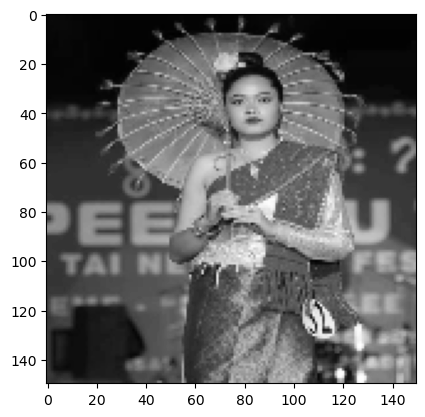

In [11]:

dress = x_test[20].reshape(150,150)
categories = ['Adi','Apatani','Galo','Mishmi','Monpa','Nocte','Nyishi','Singpho','Tai Khampti']

print("prediction is", categories[prediction[20]])
plt.imshow(dress,cmap='gray')
plt.show()

In [12]:
pickle.dump(grid,open('tunnedModel.pkl','wb'))